data visualization

statistical graphing

In [1]:
#Task 1.0  import libraries 
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
##import inforamtion from cleaned data from previous 
#Task 1.1  import csv file

UsedVehicle=pd.read_csv(r'.\Data\UsedCarData\clean_vehicles2.csv', header=0 )

In [3]:
#Task 1.2

UsedVehicle.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date2
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.5920,-85.518900,2021-05-03
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,32.5900,-85.480000,2021-05-03
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al,32.5900,-85.480000,2021-05-03
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al,32.6013,-85.443974,2021-05-03
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,32.5900,-85.480000,2021-05-03
5,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,rwd,other,red,al,32.5900,-85.480000,2021-05-03
6,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,4wd,other,silver,al,32.5900,-85.480000,2021-05-02
7,auburn,37990,2016.0,chevrolet,camaro ss coupe 2d,good,8 cylinders,gas,9704.0,clean,other,rwd,coupe,red,al,32.5900,-85.480000,2021-05-01
8,auburn,27990,2018.0,nissan,frontier crew cab pro-4x,good,6 cylinders,gas,37332.0,clean,other,4wd,pickup,silver,al,32.5900,-85.480000,2021-05-01
9,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,pickup,blue,al,32.5475,-85.468200,2021-04-29


In [4]:
#Task 1.3

UsedVehicle


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date2
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592000,-85.518900,2021-05-03
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,32.590000,-85.480000,2021-05-03
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al,32.590000,-85.480000,2021-05-03
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al,32.601300,-85.443974,2021-05-03
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,32.590000,-85.480000,2021-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129860,wyoming,25590,2017.0,unknown,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,37608.0,clean,automatic,rwd,sedan,white,wy,33.786500,-84.445400,2021-04-05
129861,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,wy,33.779214,-84.411811,2021-04-05
129862,wyoming,0,2010.0,toyota,venza,excellent,6 cylinders,gas,155000.0,clean,automatic,4wd,unknown,blue,wy,40.114685,-104.971971,2021-04-04
129863,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,wy,33.779214,-84.411811,2021-04-04


In [5]:
#Task 1.4

UsedVehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129865 entries, 0 to 129864
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   region         129865 non-null  object 
 1   price          129865 non-null  int64  
 2   year           129865 non-null  float64
 3   manufacturer   129865 non-null  object 
 4   model          129865 non-null  object 
 5   condition      129865 non-null  object 
 6   cylinders      129865 non-null  object 
 7   fuel           129865 non-null  object 
 8   odometer       129865 non-null  float64
 9   title_status   129865 non-null  object 
 10  transmission   129865 non-null  object 
 11  drive          129865 non-null  object 
 12  type           129865 non-null  object 
 13  paint_color    129865 non-null  object 
 14  state          129865 non-null  object 
 15  lat            129865 non-null  float64
 16  long           129865 non-null  float64
 17  posting_date2  129865 non-nul

In [6]:
#Task 1.5
UsedVehicle.describe()

,price,year,odometer,lat,long
count,129865.000000,129865.000000,1.298650e+05,129865.000000,129865.000000
mean,15357.131152,2008.980056,1.138303e+05,38.467921,-92.227477
std,13731.514271,10.418132,2.247677e+05,5.528774,17.417292
min,0.000000,1900.000000,0.000000e+00,-84.122245,-159.719900
25%,5500.000000,2006.000000,5.700000e+04,35.031262,-104.649129
50%,10900.000000,2011.000000,1.039730e+05,39.384750,-86.236592
75%,22500.000000,2015.000000,1.490000e+05,42.247600,-79.949997
max,195000.000000,2022.000000,1.000000e+07,82.252826,173.885502


In [7]:
#Task 2.0
#take a look what is 25%, 50% and 75% of credit of loan
# median loan 5995, 13991, 26500
np.percentile(UsedVehicle['price'],[25,50,75])

array([ 5500., 10900., 22500.])

In [8]:
#Task 3.1.0
UsedVehicle['region'].unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [9]:
#Task 3.1.1

a=len(UsedVehicle['region'].unique())
print(a)

404


In [10]:
#Task 3.2.0

UsedVehicle['manufacturer'].unique()

array(['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'honda',
       'dodge', 'chrysler', 'ram', 'mercedes-benz', 'unknown', 'infiniti',
       'bmw', 'volkswagen', 'mazda', 'porsche', 'lexus', 'ferrari',
       'audi', 'mitsubishi', 'kia', 'pontiac', 'hyundai', 'fiat', 'acura',
       'cadillac', 'rover', 'lincoln', 'jaguar', 'saturn', 'volvo',
       'alfa-romeo', 'buick', 'subaru', 'mini', 'mercury', 'tesla',
       'harley-davidson', 'datsun', 'land rover', 'aston-martin'],
      dtype=object)

In [11]:
#Task 3.2.1


a=len(UsedVehicle['manufacturer'].unique())
print(a)

42


In [12]:
#Task 3.3.0
#there is 113 years of cars.  it might be intersting to find which vehicle 
#at which year sells the most car
UsedVehicle['year'].unique()

array([2013., 2012., 2016., 2019., 2011., 2017., 2018., 2004., 2001.,
       2014., 2003., 2008., 2007., 2005., 2020., 1966., 2006., 2010.,
       2009., 2002., 2015., 1995., 1979., 1974., 1996., 1987., 1955.,
       1972., 2021., 1994., 1999., 1988., 2000., 1984., 1998., 1992.,
       1958., 1978., 1976., 1991., 1953., 1963., 1968., 1997., 1993.,
       1990., 1982., 1948., 1986., 1983., 1951., 1936., 1980., 1989.,
       1967., 1981., 1985., 1973., 1947., 1962., 1975., 1964., 1977.,
       1971., 1970., 1946., 1969., 1957., 1959., 1930., 1965., 1928.,
       1954., 1933., 1952., 1929., 1932., 1956., 1950., 1924., 1960.,
       1927., 1939., 1923., 1934., 1940., 1961., 1935., 1942., 1918.,
       1938., 1949., 1900., 1931., 1926., 1937., 1913., 1941., 2022.,
       1925., 1945., 1901., 1905., 1944., 1920.])

In [13]:
#Task 3.3.1
a=len(UsedVehicle['year'].unique())
print(a)

105


In [14]:
#Task 3.4.0
#Looking at the different model it might be hard to find something interesting out of it
UsedVehicle['model'].unique()

array(['f-150 xlt', 'sierra 2500 hd extended cab',
       'silverado 1500 double', ..., 'rx& gls sport', 'gand wagoneer',
       'Paige Glenbrook Touring'], dtype=object)

In [15]:
#Task 3.4.1
a=len(UsedVehicle['model'].unique())
print(a)

14779


In [16]:
#Task 3.5.0
#Find which type of cars are the sold
#
UsedVehicle['condition'].unique()

array(['excellent', 'good', 'like new', 'new', 'fair', 'salvage'],
      dtype=object)

In [17]:
#Task 3.5.1
a=len(UsedVehicle['condition'].unique())
print(a)

6


In [18]:
#Task 3.6.0
#type of cars are being the class
UsedVehicle['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [19]:
#Task 3.6.1
a=len(UsedVehicle['fuel'].unique())
print(a)

5


In [20]:
#Task 3.7.0
#type of car sold
UsedVehicle['title_status'].unique()

array(['clean', 'rebuilt', 'salvage', 'missing', 'lien', 'parts only'],
      dtype=object)

In [21]:
#Task 3.7.1
a=len(UsedVehicle['title_status'].unique())
print(a)

6


In [22]:
#Task 3.8.0
UsedVehicle['transmission'].unique()

array(['automatic', 'other', 'manual', 'unknown'], dtype=object)

In [23]:
#Task 3.8.1
a=len(UsedVehicle['transmission'].unique())
print(a)

4


In [24]:
#Task 3.9.0
UsedVehicle['drive'].unique()

array(['rwd', '4wd', 'fwd'], dtype=object)

In [25]:
#Task 3.10
a=len(UsedVehicle['drive'].unique())
print(a)

3


In [26]:
#Task 3.11.0
UsedVehicle['type'].unique()

array(['truck', 'pickup', 'other', 'coupe', 'mini-van', 'SUV', 'sedan',
       'offroad', 'bus', 'van', 'convertible', 'unknown', 'hatchback',
       'wagon'], dtype=object)

In [27]:
#Task 3.11.1
UsedVehicle_new02=UsedVehicle.groupby(['type','year'])['price'].mean()
UsedVehicle_new02

type   year  
SUV    1900.0    38250.000000
       1946.0     8000.000000
       1955.0    12500.000000
       1957.0     2500.000000
       1959.0    17500.000000
                     ...     
wagon  2017.0    20310.209302
       2018.0    11606.109489
       2019.0    24060.772727
       2020.0    26849.454545
       2021.0    30995.000000
Name: price, Length: 1029, dtype: float64

In [28]:
#Task 3.11.2
a=len(UsedVehicle['type'].unique())
print(a)

14


There are 14 type of cars. i want to see what is average price
From below the least expesnive is hatchback. 1/4 of data is unknown ['type'] of vehicle

In [29]:
#Task 3.11.3
UsedVehicle_new02=UsedVehicle.groupby(['type'])['price'].mean()
UsedVehicle_new02

type
SUV            13456.220878
bus            17387.722222
convertible    16848.125167
coupe          20329.858443
hatchback       8528.266509
mini-van        8936.636169
offroad        16385.389432
other          27363.403788
pickup         23211.309242
sedan          10026.804404
truck          21827.403885
unknown        13701.582176
van            16554.883754
wagon          10125.583175
Name: price, dtype: float64

In [30]:
#Task 3.11.4

pickup_vehicle = UsedVehicle[UsedVehicle['type']=='pickup']

In [31]:
#Task 3.11.5

pickup_vehicle[['manufacturer','model','price', 'year']].head(25)

,manufacturer,model,price,year
1,gmc,sierra 2500 hd extended cab,27990,2012.0
2,chevrolet,silverado 1500 double,34590,2016.0
4,chevrolet,colorado extended cab,29990,2016.0
8,nissan,frontier crew cab pro-4x,27990,2018.0
9,ford,f250 super duty,19900,2004.0
13,chevrolet,silverado 1500 double,29990,2014.0
17,toyota,tacoma double cab pickup,29990,2012.0
19,ram,1500 crew cab tradesman,33990,2017.0
20,gmc,sierra 1500 limited double,36590,2019.0
21,ford,f250 super duty regular cab,40590,2019.0


In [32]:
#Task 3.11.6

price_pickup = pickup_vehicle[pickup_vehicle['price']>100000]

In [33]:
#Task 3.11.7

price_pickup

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date2
59388,detroit metro,110000,2021.0,ram,trx 1500,like new,8 cylinders,gas,451.0,clean,automatic,4wd,pickup,white,mi,42.4264,-83.3017,2021-05-01
77721,north jersey,114999,2006.0,unknown,freightliner business class m2,good,6 cylinders,diesel,35000.0,clean,automatic,rwd,pickup,yellow,nj,40.8693,-74.1711,2021-04-21


In [34]:
price_pickup.count()

region           2
price            2
year             2
manufacturer     2
model            2
condition        2
cylinders        2
fuel             2
odometer         2
title_status     2
transmission     2
drive            2
type             2
paint_color      2
state            2
lat              2
long             2
posting_date2    2
dtype: int64

In [35]:
#Task 3.11.8

price_pickup[['manufacturer','model','price', 'year']].head(25)

,manufacturer,model,price,year
59388,ram,trx 1500,110000,2021.0
77721,unknown,freightliner business class m2,114999,2006.0


In [36]:
#Task 3.12.0
UsedVehicle['paint_color'].unique()

array(['black', 'silver', 'grey', 'red', 'blue', 'white', 'brown',
       'yellow', 'green', 'custom', 'purple', 'orange'], dtype=object)

In [37]:
#Task 3.12.1
a=len(UsedVehicle['paint_color'].unique())
print(a)

12


See section 6.1.0 for more analysis for paint_color

In [38]:
#Task 3.14.0
UsedVehicle['state'].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [39]:
#Task 3.14.1
a=len(UsedVehicle['state'].unique())
print(a)

51


there is 51 states and there are only 50 states.  I figured out they used DC as a state.  I will also compare what stated vs type of cars sold

In [40]:
#Task 3.14.2
UsedVehicle.groupby(['type'])['state'].value_counts().unstack(0)

type,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,unknown,van,wagon
state,,,,,,,,,,,,,,
ak,282.0,NaN,10.0,35.0,43.0,34.0,13.0,5.0,67.0,237.0,176.0,53.0,17.0,24.0
al,297.0,6.0,53.0,89.0,34.0,24.0,5.0,72.0,172.0,279.0,278.0,80.0,70.0,12.0
ar,237.0,2.0,23.0,87.0,42.0,17.0,6.0,44.0,124.0,223.0,187.0,220.0,23.0,10.0
az,493.0,5.0,82.0,193.0,75.0,59.0,28.0,104.0,303.0,620.0,326.0,201.0,74.0,35.0
ca,2665.0,24.0,405.0,1124.0,627.0,253.0,100.0,480.0,1335.0,4153.0,1496.0,813.0,324.0,344.0
co,802.0,10.0,68.0,167.0,109.0,38.0,25.0,70.0,242.0,566.0,305.0,355.0,65.0,83.0
ct,266.0,1.0,61.0,108.0,110.0,30.0,6.0,85.0,215.0,469.0,150.0,133.0,27.0,62.0
dc,156.0,3.0,29.0,55.0,42.0,19.0,2.0,33.0,62.0,270.0,51.0,63.0,24.0,42.0
de,75.0,1.0,15.0,30.0,6.0,8.0,1.0,4.0,21.0,126.0,75.0,49.0,4.0,17.0


In [41]:
#Task 3.15.0
UsedVehicle['posting_date2'].unique()

array(['2021-05-03', '2021-05-02', '2021-05-01', '2021-04-29',
       '2021-04-27', '2021-04-26', '2021-04-25', '2021-04-24',
       '2021-04-23', '2021-04-21', '2021-04-18', '2021-04-17',
       '2021-04-16', '2021-04-15', '2021-04-13', '2021-04-12',
       '2021-04-11', '2021-04-10', '2021-04-09', '2021-04-08',
       '2021-05-04', '2021-04-30', '2021-04-28', '2021-04-22',
       '2021-04-20', '2021-04-19', '2021-04-14', '2021-04-07',
       '2021-04-06', '2021-04-05', '2021-04-04'], dtype=object)

In [42]:
#Task 3.15.1
a=len(UsedVehicle['posting_date2'].unique())
print(a)

31


<AxesSubplot:>

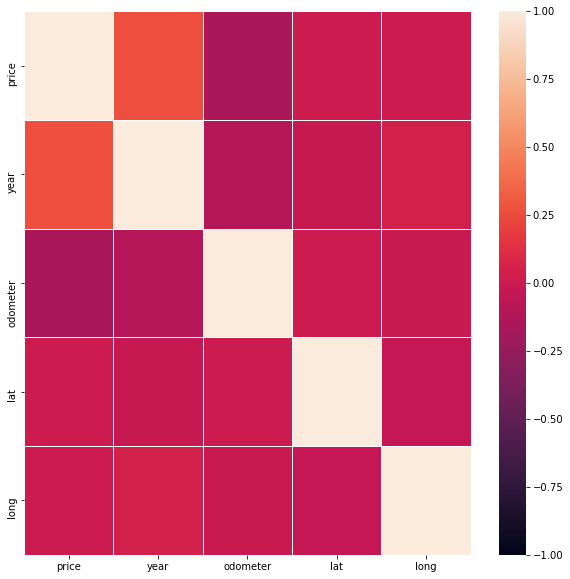

In [43]:
#Task 4.0
#test data to see correlation mapping
#Heat map with columns that are floats or int.  It will not work with str.
#adjust the scale so i can see anything that has correation greater than 0.  
#Previous chart with -1 to 1 was difficult to distinguest correlation

UsedVehicle_corr=UsedVehicle.corr()
fig,ax  =plt.subplots(figsize = (10,10))
sns.heatmap(UsedVehicle_corr, linewidth=.5,ax=ax, vmin=-1,vmax=1)

Looking at price / odometer and odometer / year

In [44]:
#Task 4.1
UsedVehicle[['odometer','year','price']].describe()

,odometer,year,price
count,1.298650e+05,129865.000000,129865.000000
mean,1.138303e+05,2008.980056,15357.131152
std,2.247677e+05,10.418132,13731.514271
min,0.000000e+00,1900.000000,0.000000
25%,5.700000e+04,2006.000000,5500.000000
50%,1.039730e+05,2011.000000,10900.000000
75%,1.490000e+05,2015.000000,22500.000000
max,1.000000e+07,2022.000000,195000.000000


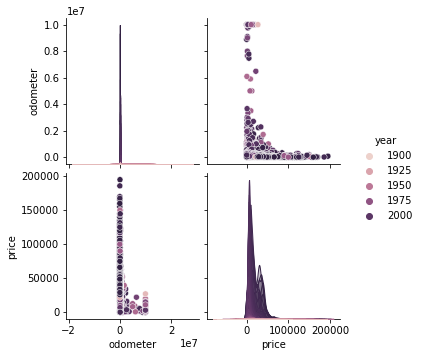

In [45]:
#Task 5.1
#seaborn pair plot
df1 = UsedVehicle[['odometer','year','price']]
sns.pairplot(df1, hue='year')



<AxesSubplot:xlabel='odometer'>

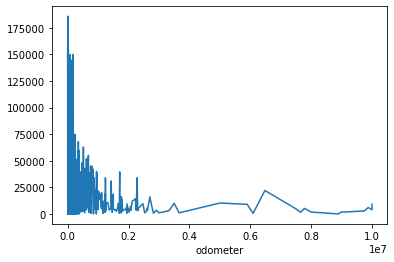

In [46]:
#Task 5.3.0
#
UsedVehicle.groupby('odometer')['price'].mean().plot()


<AxesSubplot:xlabel='year'>

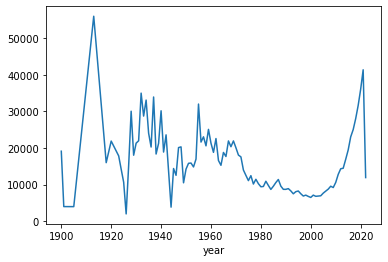

In [47]:
#Task 5.3.1
YP= UsedVehicle.groupby('year')['price'].mean()
YP.plot()

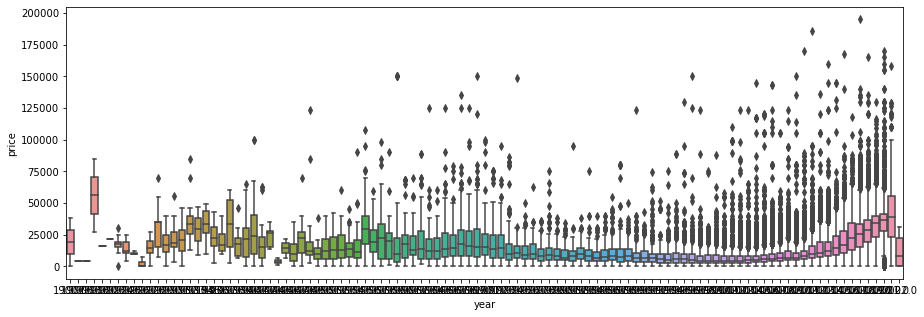

In [48]:
#Task 5.4
#box plot
#can skip because hard read, delete
plt.figure(figsize = (15,5))
sns.boxplot(x=UsedVehicle['year'] ,y=UsedVehicle['price']);
plt.show()

The Box plot was difficult to read and but if i expand it out it is very intersting

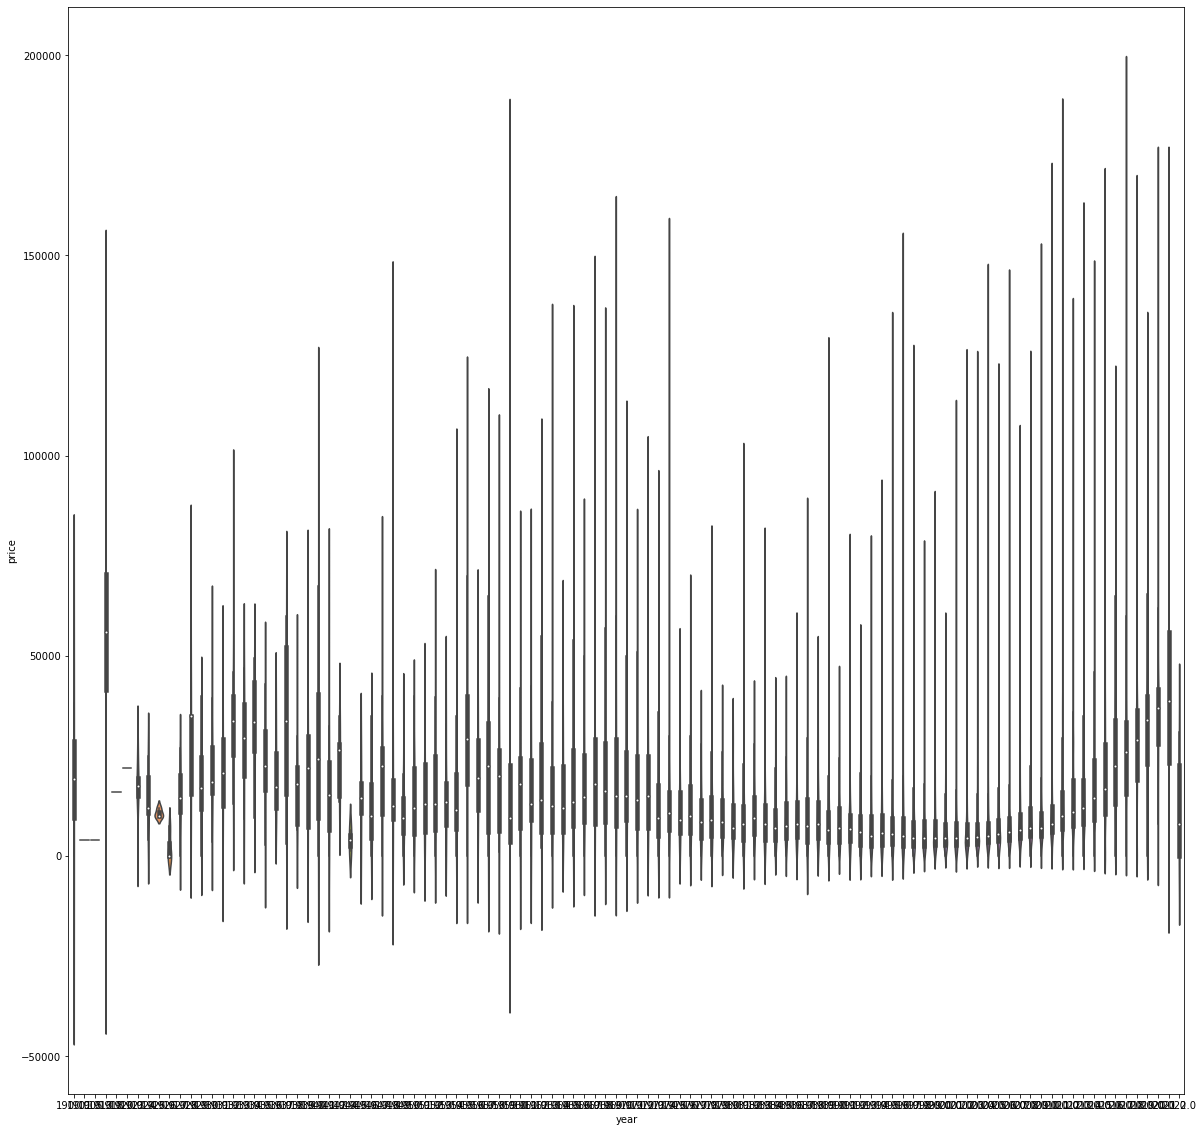

In [49]:
#Task 5.6

#Violin Plot

#aasize =(20,20)
#group by year then price.mean()

fig,ax=plt.subplots()
fig.set_size_inches(20,20)
sns.violinplot(x=UsedVehicle['year'] ,y=UsedVehicle['price'], ax =ax );
plt.show()

In [50]:
#Task 6.0
#group up category and graphy by price

UsedVehicle

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date2
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592000,-85.518900,2021-05-03
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,32.590000,-85.480000,2021-05-03
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al,32.590000,-85.480000,2021-05-03
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al,32.601300,-85.443974,2021-05-03
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,32.590000,-85.480000,2021-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129860,wyoming,25590,2017.0,unknown,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,37608.0,clean,automatic,rwd,sedan,white,wy,33.786500,-84.445400,2021-04-05
129861,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,wy,33.779214,-84.411811,2021-04-05
129862,wyoming,0,2010.0,toyota,venza,excellent,6 cylinders,gas,155000.0,clean,automatic,4wd,unknown,blue,wy,40.114685,-104.971971,2021-04-04
129863,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,wy,33.779214,-84.411811,2021-04-04


In [51]:
#Task 6.1.0
#TOP 5 color 
#Move Comment down here
# white     32294
# black     24261     
# silver    18391    
# red       14080
# blue      14030

UsedVehicle.groupby('paint_color')['paint_color'].count()

paint_color
black     24261
blue      14030
brown      3643
custom     2845
green      4282
grey      13578
orange      836
purple      413
red       14080
silver    18391
white     32294
yellow     1212
Name: paint_color, dtype: int64

In [52]:
#Task  6.1.1
#UsedVehicle_new=UsedVehicle.groupby('size')['price'].mean()
#paint_color


white = UsedVehicle[UsedVehicle['paint_color']=='white']
black = UsedVehicle[UsedVehicle['paint_color']=='black']
silver = UsedVehicle[UsedVehicle['paint_color']=='silver']
red = UsedVehicle[UsedVehicle['paint_color']=='red']
blue = UsedVehicle[UsedVehicle['paint_color']=='blue']


In [53]:
white1= white.groupby('year')['price'].mean()
black1= black.groupby('year')['price'].mean()
silver1= silver.groupby('year')['price'].mean()
red1= red.groupby('year')['price'].mean()
blue1= blue.groupby('year')['price'].mean()




In [54]:
#Task  6.1.2
white1
#dataComp=white1.groupby('paint_color')['price'].mean()
#dataComp

year
1905.0     3990.000000
1927.0     8000.000000
1931.0    22500.000000
1934.0    32500.000000
1937.0    27700.000000
              ...     
2018.0    28782.796244
2019.0    33010.689791
2020.0    36504.575025
2021.0    39796.183099
2022.0     1166.666667
Name: price, Length: 82, dtype: float64

<AxesSubplot:xlabel='year'>

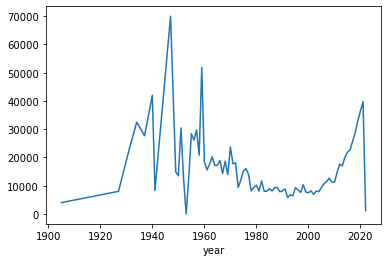

In [55]:
#Task  6.1.3
white1.plot()

<AxesSubplot:xlabel='year'>

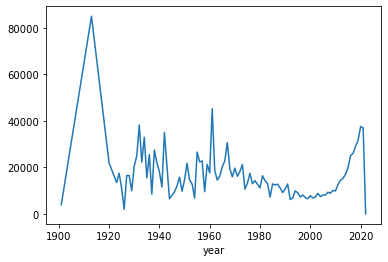

In [56]:
#Task  6.1.4
black1.plot()

<AxesSubplot:xlabel='year'>

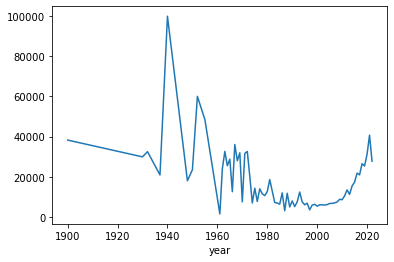

In [57]:
#Task  6.1.5
silver1.plot()

<AxesSubplot:xlabel='year'>

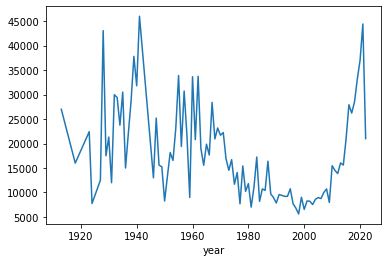

In [58]:
#Task  6.1.6
red1.plot()

<AxesSubplot:xlabel='year'>

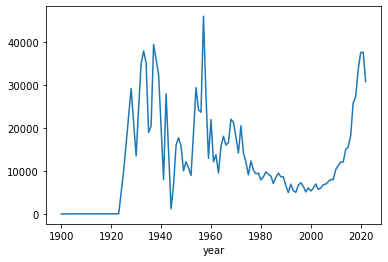

In [59]:
#Task  6.1.7
blue1.plot()

Filter by Type to compare price

There are the following type of vehicles but we will go for top 4-5 types
'pickup', 
'truck', 
'other', 
'unknown', 
'coupe', 
'SUV', 
'hatchback',
'mini-van',
'sedan', 
'offroad', 
'bus', 
'van', 
'convertible',
'wagon']

I will choose trucks, SUV, mini-van,sedan and pickup.  Below is count of each type

In [60]:
#Task  6.2.0
UsedVehicle.groupby('type')['type'].count()

type
SUV            28029
bus              234
convertible     3739
coupe           8901
hatchback       4664
mini-van        2798
offroad          511
other           3326
pickup         12909
sedan          31928
truck          16834
unknown         9358
van             3484
wagon           3150
Name: type, dtype: int64

In [61]:
allvehicle_price = UsedVehicle.groupby('year')['price'].mean()

<AxesSubplot:xlabel='year'>

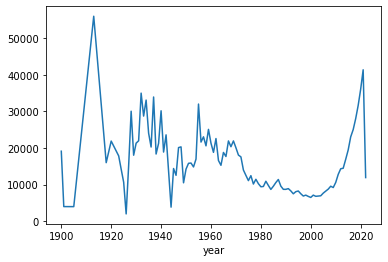

In [62]:
allvehicle_price.plot()

In [63]:
#Task  6.2.1

UsedVehicle[['type','price']]

,type,price
0,truck,15000
1,pickup,27990
2,pickup,34590
3,truck,35000
4,pickup,29990
...,...,...
129860,sedan,25590
129861,other,32990
129862,unknown,0
129863,sedan,33590


In [64]:
#Task  6.2.2
    
SUV = UsedVehicle[UsedVehicle['type']=='SUV']
MINI = UsedVehicle[UsedVehicle['type']=='mini-van']
PICKUP = UsedVehicle[UsedVehicle['type']=='pickup']
SEDAN = UsedVehicle[UsedVehicle['type']=='sedan']
TRUCK = UsedVehicle[UsedVehicle['type']=='truck']


In [65]:
#Task  6.2.3
#need to select a different type as there is 
#~ 8.4% is zero

a=  len (SUV[SUV['price']==0])
b = len(SUV['price'])
print('Price is zero: '+ str(a))
print ('Total SUV count: '+ str(b))
print(a/b)

Price is zero: 1212
Total SUV count: 28029
0.043240929037782296


In [66]:
 #Task  6.2.4
suv1=SUV.groupby('year')['price'].mean()
suv1

year
1900.0    38250.000000
1946.0     8000.000000
1955.0    12500.000000
1957.0     2500.000000
1959.0    17500.000000
              ...     
2018.0    27270.586649
2019.0    27226.593625
2020.0    33008.559767
2021.0    35058.364865
2022.0    29287.500000
Name: price, Length: 65, dtype: float64

<AxesSubplot:xlabel='year'>

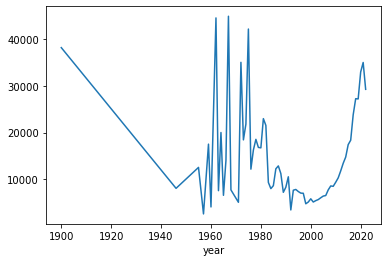

In [67]:
#Task  6.2.5
suv1.plot()

In [68]:
#Task  6.2.5
a=  len (MINI[MINI['price']==0])
b = len(MINI['price'])
print('Price is zero: '+ str(a))
print ('Total MINI count: '+ str(b))
print(a/b)

Price is zero: 105
Total MINI count: 2798
0.03752680486061472


In [69]:
#Task  6.2.6
mini1 =MINI.groupby('year')['price'].mean()
mini1

year
1956.0    29000.000000
1971.0     6500.000000
1980.0     2250.000000
1987.0    16062.500000
1989.0      500.000000
1990.0     3000.000000
1991.0      700.000000
1992.0    10747.000000
1993.0     9622.500000
1994.0     1769.000000
1995.0    10286.272727
1996.0     2862.666667
1997.0     2050.000000
1998.0     3896.904762
1999.0     3088.961538
2000.0     3700.000000
2001.0     3733.186047
2002.0     3065.887097
2003.0     3685.346667
2004.0     4156.169492
2005.0     3811.552326
2006.0     5221.031414
2007.0     4803.395122
2008.0     5321.158798
2009.0     6031.031579
2010.0     6513.510870
2011.0     9029.190184
2012.0     9659.161905
2013.0     9488.367521
2014.0    11024.485714
2015.0    12631.985915
2016.0    14119.525974
2017.0    17653.301075
2018.0    20222.430380
2019.0    23145.433333
2020.0    37420.814815
2021.0     8946.250000
Name: price, dtype: float64

<AxesSubplot:xlabel='year'>

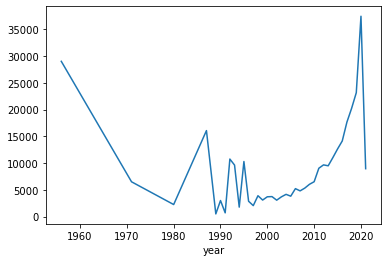

In [70]:
#Task  6.2.7
mini1.plot()


In [71]:
#Task  6.2.7
a=  len (PICKUP[PICKUP['price']==0])
b = len(PICKUP['price'])
print('Price is zero: '+ str(a))
print ('Total PICKUP count: '+ str(b))
print(a/b)

Price is zero: 345
Total PICKUP count: 12909
0.026725540320706485


In [72]:
#Task  6.2.9
pickup1 = PICKUP.groupby('year')['price'].mean()
pickup1


year
1923.0    25000.000000
1925.0    10000.000000
1927.0     3700.000000
1928.0    30833.333333
1929.0    10300.000000
              ...     
2017.0    32641.279959
2018.0    35271.441055
2019.0    39440.382046
2020.0    42705.655949
2021.0    51770.105263
Name: price, Length: 92, dtype: float64

<AxesSubplot:xlabel='year'>

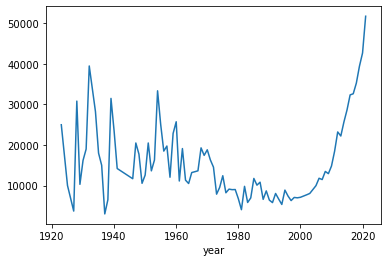

In [73]:
#Task  6.2.10
pickup1.plot()

In [74]:
#Task  6.2.11
a=  len (SEDAN[SEDAN['price']==0])
b = len(SEDAN['price'])
print('Price is zero: '+ str(a))
print ('Total SEDAN count: '+ str(b))
print(a/b)

Price is zero: 1023
Total SEDAN count: 31928
0.03204084189426209


In [75]:
#Task  6.2.12
sedan1 = SEDAN.groupby('year')['price'].mean()
sedan1

year
1924.0    22000.000000
1927.0    10333.333333
1928.0    31416.666667
1929.0    21975.000000
1930.0    18600.000000
              ...     
2017.0    16638.239669
2018.0    19330.255831
2019.0    24247.832061
2020.0    28512.968379
2021.0    22466.666667
Name: price, Length: 93, dtype: float64

<AxesSubplot:xlabel='year'>

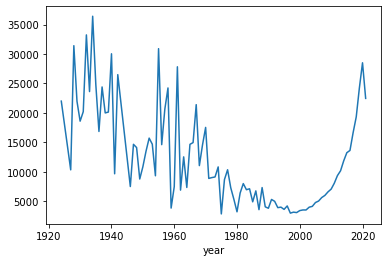

In [76]:
#Task  6.2.13
sedan1.plot()

In [77]:
#Task  6.2.14
a=  len (TRUCK[TRUCK['price']==0])
b = len(TRUCK['price'])
print('Price is zero: '+ str(a))
print ('Total TRUCK count: '+ str(b))
print(a/b)

Price is zero: 1001
Total TRUCK count: 16834
0.05946299156469051


In [78]:
#Task  6.2.15
truck1=  TRUCK.groupby('year')['price'].mean()

<AxesSubplot:xlabel='year'>

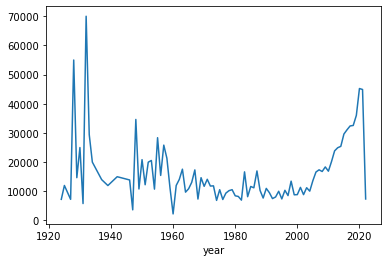

In [79]:
#Task  6.2.16
truck1.plot()

Hypothesis Testing

In [80]:
#Task 7.0.0
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [81]:
#Task 7.1.0
gmcvehicle=UsedVehicle[UsedVehicle['manufacturer']== 'gmc']

In [82]:
#Task 7.1.1
gmcvehicle.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date2
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,32.5900,-85.480,2021-05-03
20,auburn,36590,2019.0,gmc,sierra 1500 limited double,good,8 cylinders,gas,14222.0,clean,other,4wd,pickup,blue,al,32.5900,-85.480,2021-04-18
26,auburn,28590,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,20736.0,clean,other,fwd,SUV,white,al,32.5900,-85.480,2021-04-15
63,birmingham,12500,2008.0,gmc,yukon xl,excellent,8 cylinders,gas,177326.0,clean,automatic,rwd,SUV,black,al,33.5554,-86.887,2021-05-03
65,birmingham,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,33.5200,-86.790,2021-05-03


In [83]:
#Task 7.1.2
ANOVData=gmcvehicle[['model','price']]

In [84]:
#Task 7.1.3
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=ANOVData, res_var='price', anova_model='price ~ C(model)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(model),552.0,5.905164e+11,1.069776e+09,8.370282,0.0
Residual,4610.0,5.891878e+11,1.278065e+08,NaN,NaN


In [85]:
#Task 7.2.1
ford=UsedVehicle[UsedVehicle['manufacturer']== 'ford']

In [86]:
#Task 7.2.2
FordData=ford[['model','price']]

In [87]:
#Task 7.2.3
res = stat()
res.anova_stat(df=FordData, res_var='price', anova_model='price ~ C(model)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(model),1925.0,2.719653e+12,1.412807e+09,13.78976,0.0
Residual,20695.0,2.120271e+12,1.024533e+08,NaN,NaN


In [88]:
#Task 7.3.1
toyata=UsedVehicle[UsedVehicle['manufacturer']== 'toyota']

In [89]:
#Task 7.3.2
ToyotaData=toyata[['model','price']]

In [90]:
#Task 7.3.3
res = stat()
res.anova_stat(df=ToyotaData, res_var='price', anova_model='price ~ C(model)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(model),828.0,8.707525e+11,1.051633e+09,16.259775,0.0
Residual,9977.0,6.452824e+11,6.467700e+07,NaN,NaN
